<a href="https://colab.research.google.com/github/Tieck-IT/Study/blob/main/PyTorch/PyTorch_220117_firststudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ AiDALab 양석환 | NLP - 02 ]

---

- 참고도서
  - 파이토치 첫걸음 (두세교 / 김완섭 : 제이펍)
  - 펭귄브로의 3분 딥러닝, 파이토치맛 (김건우, 염상준 : 한빛미디어)

---

# **파이토치 개요**

- 파이토치와 텐서플로
  - 텐서플로
    - Google에서 개발
      - 텐서플로는 원래 텐서를 중심으로 하는 데이터의 흐름을 프로그래밍하기 위한 도구로 개발됨
      - 딥러닝 또한 각 노드 간의 데이터 흐름에 따라 최적화가 진행되는 모델이므로 텐서플로의 목적에 부합/포함됨
      - 이후 딥러닝이 확산됨에 따라 딥러닝을 위한 패키지로서 더 잘 알려지게됨
    - 자체 딥러닝용 하드웨어인 TPU 보유 → NVIDIA의 GPU로부터 다소 자유로움
    - 많은 유저, 커뮤니티와 공개된 깃허브 소스코드 및 사전훈련된 모델 보유
  - 파이토치
    - Facebook을 중심으로 개발
      - Google의 텐서플로에 대항하기 위하여 개발됨. 원래의 프로젝트는 Torch이며 파이썬 버전으로 만들어진 것이 파이토치임
      - 처음부터 딥러닝/머신러닝 모델에 집중하여 개발됨
    - 파이토치의 개발에 NVIDIA가 함께 참여 → NVIDIA의 CUDA GPU에 최적화
      - NVIDIA에서도 파이토치의 활용을 권장
      - 특히 **자연어 처리 분야에서는 텐서플로보다 파이토치를 적극 권장**하고 있음
    - 텐서플로보다 늦게 시작함에 따라 상대적으로 적은 User Pool 보유 → 현재 많이 따라잡음

## Ⅰ. 파이토치 기초

### 1.1 기본 모듈 임포트

In [1]:
import numpy as np
import torch

### 1.2 GPU 사용 설정하기

In [2]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cuda


### 1.3 기본 데이터형(텐서) 사용하기

In [12]:
# 중첩 list를 지정
t = torch.tensor([[1, 2], [3, 4.]])
print(t)

tensor([[1., 2.],
        [3., 4.]])


In [14]:
# device를 지정하면 GPU로 Tensor를 만들 수 있다
t = torch.tensor([[1, 2], [3, 4.]], device='cuda')
print(t)

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')


In [15]:
# dtype을 사용해 데이터형을 지정해 Tensor를 만들 수 있다
t = torch.tensor([[1, 2], [3, 4.]], dtype=torch.float64)
print(t)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [16]:
# 0부터 9까지의 수치로 초기화된 1차원 Tensor
t = torch.arange(0, 10)
print(t)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [17]:
#모든 값이 0인 100 x 10 의 Tensor를 작성해서 to메서드로 GPU에 전송
if DEVICE == 'cuda':
  t = torch.zeros(100, 10).to("cuda:0")
else:
  t = torch.zeros(100, 10)

print(t)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [ ]:
# 정규 난수로 100 x 10의 Tensor를 작성
t = torch.randn(100, 10)
print(t)

In [19]:
# Tensor의 shape은 size 메서드로 취득 가능
t.size()

torch.Size([100, 10])

In [20]:
type(t)

torch.Tensor

In [21]:
# numpy 메서드를 사용해 ndarray로 변환
t = torch.tensor([[1, 2], [3, 4.]])
x = t.numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [22]:
# GPU上상의 Tensor는 cpu메서드로,
# CPU의 Tensor로 이동(변환)할 필요가 있다
t = torch.tensor([[1, 2], [3, 4.]], device="cuda:0")
x = t.to("cpu").numpy()
x

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [31]:
t = torch.tensor(x,device='cuda')
t
t.to('cpu').to('cuda').to('cuda').to('cpu').to('cpu').to('cuda').to('cuda')

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [32]:
t = torch.tensor([[1,2,3], [4,5,6.]])

# 스칼라 첨자 지정
print(t[0, 2])

# 슬라이스로 지정
print(t[:, :2])

# 리스트로 지정
print(t[:, [1,2]])

# 마스크 배열을 시용해서 3보다 큰 부분만 선택
print(t[t > 3])

tensor(3.)
tensor([[1., 2.],
        [4., 5.]])
tensor([[2., 3.],
        [5., 6.]])
tensor([4., 5., 6.])


In [33]:
# [0, 1]의 요소를 100으로 설정
t[0, 1] = 100
print(t)

# 슬라이스를 사용한 일괄 대입
t[:, 1] = 200
print(t)      

# 마스크 배열을 사용해서 특정 조건의 요소만 치환
t[t > 10] = 20
print(t)

tensor([[  1., 100.,   3.],
        [  4.,   5.,   6.]])
tensor([[  1., 200.,   3.],
        [  4., 200.,   6.]])
tensor([[ 1., 20.,  3.],
        [ 4., 20.,  6.]])


In [34]:
# 길이 3인 벡터
v = torch.tensor([1, 2, 3.])
w = torch.tensor([0, 10, 20.])
print('v=', v)
print('w=', w)

v= tensor([1., 2., 3.])
w= tensor([ 0., 10., 20.])


In [35]:
# 2 × 3의 행렬
m = torch.tensor([[0, 1, 2], [100, 200, 300.]])
print('m=', m)

m= tensor([[  0.,   1.,   2.],
        [100., 200., 300.]])


In [53]:
test = torch.stack([v,w],dim=0)
print(test.size())
test

torch.Size([2, 3])


tensor([[ 1.,  2.,  3.],
        [ 0., 10., 20.]])

In [36]:
# 벡터와 스칼라의 덧셈
v2 = v + 10
print('v2=', v2)

v2= tensor([11., 12., 13.])


In [54]:
# 제곱도 같은 방식
v2 = v ** 2
print('v2=', v2)

v2= tensor([1., 4., 9.])


In [55]:
# 동일 길이의 벡터 간 뺄쎔
z = v - w
print('z=', z)

z= tensor([  1.,  -8., -17.])


In [56]:
# 여러 가지 조합
u = 2 * v - w / 10 + 6.0
print('u=', u)

u= tensor([ 8.,  9., 10.])


In [57]:
# 행렬과 스칼라
m2 = m * 2.0
print('m2=', m2)

m2= tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])


In [58]:
# 행렬과 벡터
#(2, 3)인 행렬과 (3,)인 벡터이므로 브로드 캐스트가 작동
m3 = m + v
print('m3=', m3)

m3= tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])


In [59]:
# 행렬 간 처리
m4 = m + m
print('m4=', m4)

m4= tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])


In [60]:
# 100 × 10의 테스트 데이터 생성
X = torch.randn(100, 10)
print(X)
print("X=", X)

tensor([[-1.2955e+00,  1.9482e-01, -3.1229e-01, -5.8479e-01, -3.0552e-02,
          6.5890e-01,  5.6326e-02,  1.3336e+00, -3.0420e-01,  4.1357e-01],
        [ 6.4498e-01,  1.2878e+00,  2.6001e-01,  2.6952e-01, -1.0965e+00,
         -1.6212e+00,  1.1929e+00, -7.3659e-01, -4.1342e-01, -1.0622e+00],
        [-3.2875e-01,  7.7414e-01,  7.2151e-01,  9.4427e-01, -1.7431e+00,
          7.7940e-01, -6.9703e-01, -1.4066e+00, -1.0356e+00, -4.6274e-01],
        [-5.9376e-01,  9.2863e-01, -2.2576e+00,  9.4064e-01,  8.3750e-01,
          4.2517e-01,  9.9830e-01,  5.6816e-01, -1.6942e+00,  1.1362e+00],
        [ 1.4971e+00, -8.5174e-02,  7.0548e-01, -2.3516e-01, -3.4079e-01,
          2.2971e+00, -5.0011e-02,  7.1668e-01,  1.1550e+00,  5.5393e-01],
        [-6.0393e-01, -1.1936e+00, -1.1584e+00, -1.1424e+00, -9.6166e-01,
         -1.3289e+00,  3.8272e-01, -1.1714e+00, -8.2543e-01, -4.5465e-01],
        [ 1.0654e+00, -2.8344e+00, -1.0281e+00,  9.5446e-01, -4.3409e-01,
          1.0518e+00,  1.0109e+0

In [61]:
# 수학 함수를 포함하는 수식
y = X * 2 + torch.abs(X)
print("y=", y)

y= tensor([[-1.2955e+00,  5.8447e-01, -3.1229e-01, -5.8479e-01, -3.0552e-02,
          1.9767e+00,  1.6898e-01,  4.0007e+00, -3.0420e-01,  1.2407e+00],
        [ 1.9349e+00,  3.8634e+00,  7.8003e-01,  8.0855e-01, -1.0965e+00,
         -1.6212e+00,  3.5786e+00, -7.3659e-01, -4.1342e-01, -1.0622e+00],
        [-3.2875e-01,  2.3224e+00,  2.1645e+00,  2.8328e+00, -1.7431e+00,
          2.3382e+00, -6.9703e-01, -1.4066e+00, -1.0356e+00, -4.6274e-01],
        [-5.9376e-01,  2.7859e+00, -2.2576e+00,  2.8219e+00,  2.5125e+00,
          1.2755e+00,  2.9949e+00,  1.7045e+00, -1.6942e+00,  3.4085e+00],
        [ 4.4914e+00, -8.5174e-02,  2.1164e+00, -2.3516e-01, -3.4079e-01,
          6.8913e+00, -5.0011e-02,  2.1501e+00,  3.4651e+00,  1.6618e+00],
        [-6.0393e-01, -1.1936e+00, -1.1584e+00, -1.1424e+00, -9.6166e-01,
         -1.3289e+00,  1.1482e+00, -1.1714e+00, -8.2543e-01, -4.5465e-01],
        [ 3.1961e+00, -2.8344e+00, -1.0281e+00,  2.8634e+00, -4.3409e-01,
          3.1554e+00,  3.0327

In [62]:
# 평균치 구하기
m = torch.mean(X)
print('m=', m)

m= tensor(0.0063)


In [63]:
# 함수가 아닌 메서드로도 사용할 수 있다
m = X.mean()
print('m=', m)

m= tensor(0.0063)


In [64]:
# 집계 결과는 0차원의 Tensor로 item 메서드를 사용해서
# 값을 추출할 수 있다
m_value = m.item()
print('m_value=', m_value)

m_value= 0.006345528177917004


In [65]:
# 집계는 차원을 지정할 수도 있다. 다음은 행 방향으로 집계해서,
# 열 단위로 평균값을 계산한다
m2 = X.mean(0)
print('m2=', m2)

m2= tensor([ 0.0836,  0.0678, -0.0545, -0.0537, -0.0773, -0.0004,  0.2559, -0.0571,
        -0.1463,  0.0454])


In [67]:
x1 = torch.tensor([[1, 2], [3, 4.]]) # 2×2
x2 = torch.tensor([[10, 20, 30], [40, 50, 60.]]) # 2×3

# 2×2를 4×1로 보여준다
print(x1)
print(x1.view(4, 1))
print('----------------------------------------------')

# -1는 나머지 차원을 나타내며 한 번만 사용할 수 있다
# 아래 예에선 -1을 사용하면 자동으로 4가 된다
print(x1.view(1, -1))
print('----------------------------------------------')

# 2×3을 전치해서 3×2로 만든다
print(x2.t())
print('----------------------------------------------')

# dim=1로 결합하면 2×5의 Tensor를 만든다
torch.cat([x1, x2], dim=1)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1.],
        [2.],
        [3.],
        [4.]])
----------------------------------------------
tensor([[1., 2., 3., 4.]])
----------------------------------------------
tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])
----------------------------------------------


tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])

In [68]:
# HWC을 CHW로 변환
# 64×32×3의 데이터가 100개
hwc_img_data = torch.rand(100, 64, 32, 3)
print(hwc_img_data)
print('----------------------------------------------')
chw_img_data = hwc_img_data.transpose(1, 2).transpose(1, 3)
print(chw_img_data)

tensor([[[[4.5841e-01, 5.4336e-01, 7.0780e-01],
          [1.6569e-01, 9.6246e-01, 1.8309e-01],
          [6.2982e-01, 6.6633e-01, 4.4143e-02],
          ...,
          [2.8192e-01, 8.1077e-01, 6.8110e-01],
          [7.9071e-01, 5.4127e-01, 1.1267e-01],
          [2.5943e-01, 9.2789e-01, 3.8819e-01]],

         [[3.6048e-02, 2.9151e-01, 8.0195e-01],
          [5.8008e-01, 9.4303e-01, 4.3155e-01],
          [4.8782e-01, 8.5865e-01, 8.5979e-01],
          ...,
          [4.4143e-01, 7.7294e-01, 2.0353e-01],
          [5.0838e-01, 5.0845e-01, 6.2164e-01],
          [7.2018e-01, 7.6370e-01, 6.9035e-01]],

         [[8.7772e-01, 6.7926e-01, 8.8493e-01],
          [6.1764e-01, 6.8482e-01, 8.3903e-02],
          [4.0031e-01, 3.4535e-01, 2.5176e-01],
          ...,
          [7.5298e-01, 5.5387e-01, 8.0554e-01],
          [1.6252e-01, 6.9894e-01, 1.3749e-01],
          [6.6442e-01, 5.4370e-01, 4.6602e-02]],

         ...,

         [[5.3400e-02, 2.0980e-01, 8.6052e-01],
          [5.4886e-01,

In [69]:
m = torch.randn(100, 10)
v = torch.randn(10)
print('m = ', m)
print('v = ', v)

m =  tensor([[ 2.4393e-01, -2.2840e-01,  8.4966e-01, -1.6049e+00, -7.4728e-01,
         -3.2176e-01, -7.1624e-02, -2.1428e+00, -4.3624e-01,  1.0376e+00],
        [ 3.5811e-03, -2.6071e+00, -8.0200e-01, -1.0605e-01, -8.1061e-01,
          1.2533e-01,  6.5406e-01, -2.0924e+00,  4.9468e-01, -8.7839e-01],
        [ 4.6076e-01, -1.9317e+00,  1.7870e-01,  3.0641e-01, -6.5314e-01,
         -1.7130e-01, -1.3050e-01,  4.5769e-01,  1.0644e+00, -1.9430e+00],
        [ 1.0661e+00,  1.3346e+00,  1.6649e-01,  5.0962e-01,  5.6153e-02,
          1.8223e+00,  3.4782e-01, -9.2432e-01, -1.4094e+00,  6.3837e-01],
        [-3.1816e-02, -2.1854e+00,  3.0231e-01, -1.3174e-02,  4.9220e-01,
         -6.6083e-01, -1.1656e+00, -1.8200e+00,  1.2969e+00, -3.0407e-01],
        [ 3.8018e-01,  1.7108e+00, -6.5843e-01,  2.6473e+00, -6.5501e-01,
          7.9631e-02, -1.0449e+00, -3.4581e-01,  1.6152e+00,  1.2380e+00],
        [-1.2376e-01, -7.4597e-01,  5.9512e-01, -1.2890e+00, -7.6353e-01,
          1.6315e-02,  1.01

In [70]:
# 내적
d = torch.dot(v, v)
print('d = v·v = ', d)

d = v·v =  tensor(10.7906)


In [71]:
# 100 × 10의 행렬과 길이 10인 벡터의 곱
# 결과는 길이 100인 벡터
v2 = torch.mv(m, v)
print('v2 = ', v2)

v2 =  tensor([-6.3149,  2.3397,  7.6702, -4.8651,  0.4119, -2.1010,  4.1766, -0.0308,
        -0.0324,  0.6046, -0.2356, -0.1841, -1.5953,  5.7020,  7.3771, -5.3122,
         1.2320, -4.9377,  2.2946, -6.0630, -2.0365,  4.5628, -1.7955,  0.5127,
         1.3654, -8.3964, -4.8963, -3.7008, -1.5625,  3.2019, -3.5354, -2.8461,
         3.1856, -1.0888, -2.3927,  2.3988,  0.9168, -1.5794,  4.9501, -2.5284,
        -0.8450,  1.0081,  0.2239, -6.9402,  3.1755, -0.1895, -0.9349, -9.1311,
         5.2378, -5.7390,  2.1501,  0.9455,  0.1102, -2.9141, -2.1751, -3.4441,
         5.4082,  3.5055,  2.1273,  1.4065, -2.8218, -0.0554, -6.0203,  1.6144,
        -5.0796, -5.1483,  4.0536, -4.8900,  7.2721, -2.3835, -2.0446, -0.3093,
        -4.6995, -0.2721,  4.9990,  0.2144, -0.9297,  1.8732,  1.8801, -4.2664,
        -1.9289, -8.1540,  2.9453, -0.8870, -0.8996, -2.0833,  4.9588, -2.6810,
        -2.0874,  3.8141, -2.2129,  1.9525,  2.1391,  1.8774, -2.3094, -5.6962,
        -0.3116, -1.7384, -0.3729,

In [72]:
# 행렬곱
m2 = torch.mm(m.t(), m)
print('m2 = ', m2)

m2 =  tensor([[ 8.1215e+01,  1.9441e+00, -3.2713e+00,  1.2706e+01,  5.7515e+00,
         -5.9810e-01,  7.9745e+00, -1.6729e-01,  6.2405e+00, -4.8501e-01],
        [ 1.9441e+00,  1.0926e+02, -1.2637e+01,  1.0479e+01, -9.5434e-01,
         -1.1737e+01, -7.3769e+00,  1.9049e+01, -2.5790e+01,  6.8538e+00],
        [-3.2713e+00, -1.2637e+01,  1.2030e+02, -2.0112e+01, -4.3150e+00,
          2.1533e+01,  1.4874e+01,  2.1828e+01, -1.2200e+00, -1.5015e+01],
        [ 1.2706e+01,  1.0479e+01, -2.0112e+01,  1.1542e+02,  4.7302e+00,
         -6.3199e+00,  1.5723e+01, -5.6159e+00, -2.9745e-02,  4.3378e+00],
        [ 5.7515e+00, -9.5434e-01, -4.3150e+00,  4.7302e+00,  9.2235e+01,
          7.9395e+00, -6.3411e+00,  5.1828e+00, -9.4431e-01, -1.5134e+01],
        [-5.9810e-01, -1.1737e+01,  2.1533e+01, -6.3199e+00,  7.9395e+00,
          1.1291e+02, -7.8069e+00, -7.5377e+00, -1.1603e+01, -1.3451e+01],
        [ 7.9745e+00, -7.3769e+00,  1.4874e+01,  1.5723e+01, -6.3411e+00,
         -7.8069e+00,  1.3

In [73]:
# 특이값 분해
u, s, v = torch.svd(m)
print('u = ', u)
print('s = ', s)
print('v = ', v)

u =  tensor([[ 2.1765e-02, -1.8884e-02,  1.2615e-01, -7.0581e-02,  1.6593e-01,
         -3.8121e-02, -6.7652e-02,  1.4567e-01,  1.6233e-01,  5.8503e-02],
        [ 2.8551e-02,  1.3568e-01,  1.9511e-01,  9.3268e-02,  1.0110e-01,
         -1.4398e-01,  7.3739e-02,  6.7882e-02, -7.2349e-02, -6.2781e-02],
        [ 8.9131e-02,  8.9278e-02,  6.4562e-02,  2.1135e-02, -8.2373e-02,
         -2.7883e-02,  1.2851e-01,  6.7760e-02, -1.6292e-01, -1.8443e-01],
        [-1.1049e-02, -7.0171e-02, -6.6000e-02,  1.6010e-01,  1.3127e-01,
          8.7757e-02, -1.6162e-01,  5.9375e-02,  5.7765e-02,  6.6799e-02],
        [ 8.4506e-03,  6.5947e-02,  2.3287e-01,  2.8240e-02, -7.0140e-02,
         -2.6068e-02,  1.4115e-01,  8.3133e-02,  9.2845e-02, -4.6749e-02],
        [-1.9723e-01,  5.2160e-02, -1.3732e-02,  3.9059e-02, -5.0844e-03,
          2.8474e-01, -2.1513e-02, -8.6155e-02,  5.1726e-02, -1.1814e-01],
        [ 1.1332e-01,  5.7171e-02, -6.5731e-03, -1.5639e-01, -2.7427e-03,
          1.8965e-02, -4.48

In [74]:
x = torch.randn(100, 3)
print('x = ', x)
print('----------------------------------------------')

# 미분의 변수로 사용하는 경우는 requires_grad를 True로 설정
a = torch.tensor([1, 2, 3.], requires_grad=True)
print('a = ', a)
print('----------------------------------------------')

# 계산을 통해 자동으로 계산 그래프(network)가 구축된다
y = torch.mv(x, a)
o = y.sum()
print('o = ', o)
print('----------------------------------------------')

# 미분을 실행
o.backward()

# 분석 답과 비교
a.grad != x.sum(0)

x =  tensor([[-2.5395,  1.0397, -1.2786],
        [ 1.3773, -0.1910, -0.1443],
        [ 1.0309, -1.3621,  0.8753],
        [-1.3930, -0.5846,  2.4648],
        [-0.5119, -0.5204, -0.3637],
        [ 0.7570, -1.7742, -1.4859],
        [-0.4855,  1.2818,  2.1031],
        [ 0.5609,  0.8929,  0.0073],
        [-0.1907,  0.5884, -0.0857],
        [-0.7739, -0.1649,  1.5640],
        [ 0.8388, -0.7875,  0.8085],
        [-0.6463, -1.8141,  1.0933],
        [ 0.3446, -0.8431, -1.0858],
        [ 0.3931,  0.6026, -0.4949],
        [ 0.8275, -0.1823,  1.2592],
        [-1.1112, -0.1401,  0.7748],
        [ 0.7975, -0.6077, -0.6170],
        [ 0.7535,  0.0855,  0.6757],
        [ 0.4407, -0.6470,  1.4384],
        [ 1.7145, -0.8944, -0.1761],
        [ 0.1168, -2.7347,  0.3928],
        [-0.6672, -1.1554, -0.1254],
        [ 0.5968,  0.3684,  0.1328],
        [ 1.3710, -0.1880, -2.2987],
        [ 0.4189, -1.3694,  0.3244],
        [ 0.3538,  0.6809, -0.2765],
        [ 0.0910, -0.4914, -1.066

tensor([False,  True,  True])

In [75]:
# x는 requires_grad가 False이므로 미분이 계산되지 않는다
x.grad is None

True

In [77]:
a.grad is None

False

## Ⅱ. 파이토치를 이용한 딥러닝 모델

### 2.1 텐서와 자동미분(Autograd)

#### 2.1.1 텐서 다루기 기본: 차원(Rank)과 Shape

In [83]:
import torch

In [84]:
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [85]:
# squeeze 함수: 차원이 1인 차원을 제거함.
# 따로 차원을 설정하지 않으면 1인 차원을 모두 제거. 차원을 설정해주면 그 차원만 제거
x2 = torch.rand(3, 1, 20, 128)
print(x2.size())

x2 = x2.squeeze() #[3, 1, 20, 128] -> [3, 20, 128]
print(x2.size())

torch.Size([3, 1, 20, 128])
torch.Size([3, 20, 128])


In [86]:
# unsqueeze 함수: 차원이 1인 차원을 생성함.
# 어느 차원에 1인 차원을 생성할 지 꼭 지정해주어야 함.
x2 = x2.unsqueeze(dim=1) #[3, 20, 128] -> [3, 1, 20, 128]
print(x2.size())

torch.Size([3, 1, 20, 128])


In [87]:
# 랭크 늘리기
x = torch.unsqueeze(x, 0)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
Size: torch.Size([1, 3, 3])
Shape: torch.Size([1, 3, 3])
랭크(차원): 3


In [88]:
# 랭크 줄이기
x = torch.squeeze(x)
print(x)
print("Size:", x.size())
print("Shape:", x.shape) #[3, 3] 2개의 차원에 각 3개의 원소를 가진 텐서
print("랭크(차원):", x.ndimension())

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
랭크(차원): 2


In [89]:
# 랭크의 형태 바꾸기
x = x.view(9)
print(x)
print("Size:", x.size())
print("Shape:", x.shape)
print("랭크(차원):", x.ndimension())

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
Size: torch.Size([9])
Shape: torch.Size([9])
랭크(차원): 1


In [90]:
try:
    x = x.view(2,4)
except Exception as e:
    print(e) #에러 출력

shape '[2, 4]' is invalid for input of size 9


#### 2.1.2 텐서를 이용한 연산과 행렬곱

In [91]:
w = torch.randn(5,3, dtype=torch.float)
x = torch.tensor([[1.0,2.0], [3.0,4.0], [5.0,6.0]])
print("w size:", w.size())
print("x size:", x.size())
print("w:", w)
print("x:", x)

w size: torch.Size([5, 3])
x size: torch.Size([3, 2])
w: tensor([[-0.7515,  1.9113, -1.0091],
        [-1.5647,  0.0346, -0.6449],
        [-3.2011,  1.2755,  1.0903],
        [-0.0918,  0.1235, -0.2841],
        [-0.1557, -0.3958, -0.8663]])
x: tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


In [92]:
b = torch.randn(5,2, dtype=torch.float)
print("b:", b.size())
print("b:", b)

b: torch.Size([5, 2])
b: tensor([[-0.3390, -1.7580],
        [-0.3537,  0.4472],
        [-0.7040,  0.2067],
        [-0.0256, -1.5871],
        [-0.3597,  0.5610]])


In [93]:
wx = torch.mm(w,x) # w의 행은 5, x의 열은 2, 즉 shape는 [5, 2]입니다.
print("wx size:", wx.size())
print("wx:", wx)

wx size: torch.Size([5, 2])
wx: tensor([[-0.0632,  0.0876],
        [-4.6853, -6.8603],
        [ 6.0769,  5.2416],
        [-1.1415, -1.3939],
        [-5.6746, -7.0925]])


In [94]:
result = wx + b	
print("result size:", result.size()) 
print("result:", result) 

result size: torch.Size([5, 2])
result: tensor([[-0.4022, -1.6704],
        [-5.0390, -6.4131],
        [ 5.3728,  5.4483],
        [-1.1671, -2.9810],
        [-6.0343, -6.5314]])


#### 2.1.3 자동미분(Autograd)
- 사용법
  1. 계산하고자 하는 수식 생성
  2. 수식을 위한 requires_grad 값을 True로 설정. 파이토치의 Autograd 기능으로 자동 계산할 때 수식에 대한 미분값을 '수식.grad'에 저장
  3. backward() 함수를 사용하여 수식에 연쇄법칙을 적용하고 수식을 차례대로 미분

In [109]:
w = torch.tensor(1.0, requires_grad=True) # 미분 가능 선언 = 변수 선언
a = w*3 # 함수를 만드는 중
l = a**2 # i = (3*w)^2 # 함수를 만드는 중 2
l.backward() # 수식 l을 미분!!
print(w.grad) # 미분 결과는 변수에 저장
print('l을 w로 미분한 값은 {}'.format(w.grad))

tensor(18.)
l을 w로 미분한 값은 18.0


In [110]:
w.grad

tensor(18.)

- 경사하강법으로 이미지 복원하기
  - 문제의 개요
    - 이미지 처리를 위해 만들어 두었던 weird_function() 함수에 실수로 버그가 들어가 100×100 픽셀의 오염된 미미지가 만들어졌다. 
    - 이 오염된 이미지와 오염되기 전 원본 이미지를 동시에 파일로 저장하려고 했으나, 모종의 이유로 원본 이미지 파일은 삭제된 상황이다. 
    - 다행히 weird_function()의 소스코드는 남아 있다. 
    - 오염된 이미지와 weird_function()을 활용해 원본 이미지를 복원해보자.
<br><br>
  - 일반적인 접근 방법
    1. weird_function() 함수의 소스코드 분석
    2. 분석을 토대로 weird_function() 함수의 동작을 반대로 이행하는 함수 구현
    3. 2에서 구현한 함수에 오염된 이미지를 입력한 후, 복구된 이미지 출력
<br><br>
  - 머신러닝 방식의 접근 방법(사고 방법)
    1. 오염된 이미지와 같은 크기의 랜덤 텐서를 생성한다.
    2. 랜덤 텐서를 weird_function() 함수에 입력해 똑같이 오염된 이미지를 가설이라고 부른다.
      - (사실) 원본 이미지가 weird_function() 함수에 입력되어 오염된 이미지를 출력했다.
      - (사실) 인위적으로 생성한 무작위 이미지가 weird_function() 함수에 입력되어 가설을 출력했다.
    3. 가설과 오염된 이미지가 같다면 무작위 이미지와 원본 이미지도 같을 것이다.
    4. 그러므로 weird_function(random_tensor) = broken_image 관계가 성립하도록 만든다.

In [113]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [116]:
!wget https://github.com/aidalab-garnet/nlp/raw/main/data/broken_image_t.p

--2022-01-17 05:17:04--  https://github.com/aidalab-garnet/nlp/raw/main/data/broken_image_t.p
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aidalab-garnet/nlp/main/data/broken_image_t.p [following]
--2022-01-17 05:17:04--  https://raw.githubusercontent.com/aidalab-garnet/nlp/main/data/broken_image_t.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80162 (78K) [application/octet-stream]
Saving to: ‘broken_image_t.p’

broken_image_t.p    100%[===================>]  78.28K  --.-KB/s    in 0.008s  

2022-01-17 05:17:04 (9.53 MB/s) - ‘broken_image_t.p’ saved [80162/80162]



In [120]:
!pwd 

/content


In [121]:
# DATA_PATH = "/c/My Drive/Lectures/NLP/data/"
DATA_PATH = "/content/" 

In [122]:
import torch
import pickle
import matplotlib.pyplot as plt

In [123]:
shp_original_img = (100, 100)
filepath = '{}{}'.format(DATA_PATH, 'broken_image_t.p')
broken_image = torch.FloatTensor(pickle.load(open(filepath, 'rb'),encoding='latin1'))

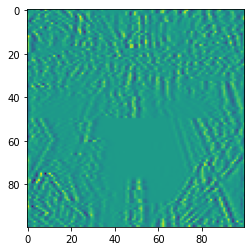

In [124]:
plt.imshow(broken_image.view(100,100)) 

In [125]:
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [126]:
def distance_loss(hypothesis, broken_image):    
    return torch.dist(hypothesis, broken_image)

In [127]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [128]:
lr = 0.8
for i in range(0,20000): 
    random_tensor.requires_grad_(True) # 미분 가능 설정 # 변수 설정
    hypothesis = weird_function(random_tensor) # 생성한 이미지 (가설 공간)
    loss = distance_loss(hypothesis, broken_image) # 와 깨진 이미지의 오차 계산
    loss.backward() # 미분 !!! random_tensor에 대해서
    with torch.no_grad(): # 만약 미분 허용 안된 경우는 (아래 연산 실행)
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.427712440490723
Loss at 1000 = 1.1530799865722656
Loss at 2000 = 0.538630485534668
Loss at 3000 = 0.37454769015312195
Loss at 4000 = 0.29675722122192383
Loss at 5000 = 0.24874137341976166
Loss at 6000 = 0.21442125737667084
Loss at 7000 = 0.18738871812820435
Loss at 8000 = 0.16458724439144135
Loss at 9000 = 0.1444064825773239
Loss at 10000 = 0.12594112753868103
Loss at 11000 = 0.1086544468998909
Loss at 12000 = 0.09221463650465012
Loss at 13000 = 0.07640735805034637
Loss at 14000 = 0.061089105904102325
Loss at 15000 = 0.04616151005029678
Loss at 16000 = 0.03155668079853058
Loss at 17000 = 0.02114260569214821
Loss at 18000 = 0.0211652722209692
Loss at 19000 = 0.021167278289794922


In [139]:
torch.no_grad()

In [138]:
with torch.no_grad():
    print("y")

y


In [ ]:
img_channel_swap_1 = tf.reverse(img, axis=[-1])

In [144]:
type(random_tensor.view(100,100)) , type(random_tensor.view(100,100).data)

(torch.Tensor, torch.Tensor)

In [148]:
random_tensor.size(), random_tensor.shape

(torch.Size([10000]), torch.Size([10000]))

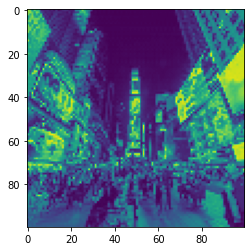

In [145]:
import cv2

plt.imshow(random_tensor.view(100,100))

### 2.2 신경망 모델 구현

#### 2.2.1 기본 형태

In [149]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [150]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [151]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

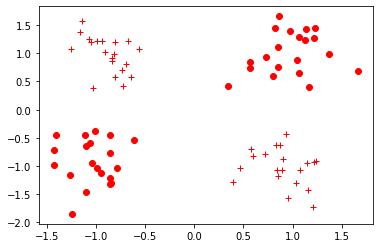

In [153]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [154]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [155]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__() # 부모의 생성자 실행
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size) #입력값의 개수, 노드의 개수 for 1st layer
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1) # 이전층의 노드 개수(= 이전 층의 출력 개수) = 다음 층의 입력 개수
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor): # kears의 model.Sequeintial()을 구현해주기 !!
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1) # tf.keras의 Dense Layer
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2) # 출력층 , sigmoid
        return output

In [156]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [157]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad() # optimizer 0 초기화
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train) # loss 함수 계산
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward() # 자동 미분
    optimizer.step()

Train loss at 0 is 0.8105130195617676
Train loss at 100 is 0.6994919776916504
Train loss at 200 is 0.6764496564865112
Train loss at 300 is 0.6434085965156555
Train loss at 400 is 0.5831032991409302
Train loss at 500 is 0.49165964126586914
Train loss at 600 is 0.3790009617805481
Train loss at 700 is 0.2831186354160309
Train loss at 800 is 0.21749868988990784
Train loss at 900 is 0.1702110916376114
Train loss at 1000 is 0.1358998715877533
Train loss at 1100 is 0.11074509471654892
Train loss at 1200 is 0.09206626564264297
Train loss at 1300 is 0.07763566076755524
Train loss at 1400 is 0.06659574806690216
Train loss at 1500 is 0.057997457683086395
Train loss at 1600 is 0.051153313368558884
Train loss at 1700 is 0.04561259225010872
Train loss at 1800 is 0.04104319214820862
Train loss at 1900 is 0.03721948340535164


In [158]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.04086821526288986


In [159]:
torch.save(model.state_dict(), DATA_PATH+'/model.pt') # {p}y{t}orch
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[ 1.2263, -1.2760],
        [-0.1576,  0.2914],
        [ 1.8054,  1.4663],
        [-1.7669, -1.6713],
        [-1.1132,  0.6309]])), ('linear_1.bias', tensor([ 0.0915, -0.6835, -0.0580, -0.2041,  0.6139])), ('linear_2.weight', tensor([[ 1.7271,  0.3589, -2.1433, -2.3275,  1.1767]])), ('linear_2.bias', tensor([1.1172]))])


In [161]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load(DATA_PATH+'/model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9799991846084595


#### 2.2.2 DNN 구현

- Fashion MNIST 데이터셋

In [162]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, utils
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np

In [163]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [164]:
trainset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', 
    train     = False,
    download  = True,
    transform = transform
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [165]:
EPOCHS = 30
BATCH_SIZE = 64

In [166]:
train_loader = data.DataLoader( # tf.keras의 DataGenerator
    dataset     = trainset,
    batch_size  = BATCH_SIZE
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE
)

In [167]:
dataiter       = iter(train_loader)
images, labels = next(dataiter)

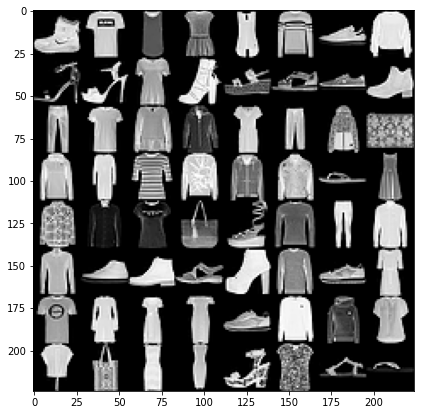

In [168]:
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [169]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5])


In [ ]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

(28, 28)


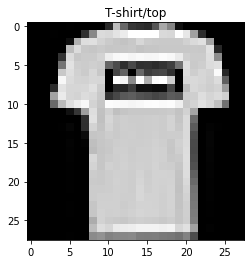

In [171]:
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

In [173]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x)) # F : torch.nn.functional
        x = F.relu(self.fc2(x)) # fc(x)의 출력값 -> relu -> x
        x = self.fc3(x)
        return x

In [174]:
# model        = Net().to(DEVICE)
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [175]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 학습 데이터를 DEVICE의 메모리로 보냄
        # data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [176]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            # 모든 오차 더하기
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()
            
            # 가장 큰 값을 가진 클래스가 모델의 예측입니다.
            # 예측과 정답을 비교하여 일치할 경우 correct에 1을 더합니다.
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [177]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.8321, Accuracy: 68.61%
[2] Test Loss: 0.6699, Accuracy: 76.48%
[3] Test Loss: 0.5957, Accuracy: 79.49%
[4] Test Loss: 0.5591, Accuracy: 80.21%
[5] Test Loss: 0.5366, Accuracy: 81.10%
[6] Test Loss: 0.5205, Accuracy: 81.49%
[7] Test Loss: 0.5079, Accuracy: 81.85%
[8] Test Loss: 0.4957, Accuracy: 82.29%
[9] Test Loss: 0.4857, Accuracy: 82.67%
[10] Test Loss: 0.4757, Accuracy: 82.96%
[11] Test Loss: 0.4668, Accuracy: 83.30%
[12] Test Loss: 0.4579, Accuracy: 83.67%
[13] Test Loss: 0.4491, Accuracy: 84.06%
[14] Test Loss: 0.4421, Accuracy: 84.35%
[15] Test Loss: 0.4351, Accuracy: 84.63%
[16] Test Loss: 0.4281, Accuracy: 84.81%
[17] Test Loss: 0.4222, Accuracy: 85.03%
[18] Test Loss: 0.4165, Accuracy: 85.12%
[19] Test Loss: 0.4117, Accuracy: 85.24%
[20] Test Loss: 0.4071, Accuracy: 85.40%
[21] Test Loss: 0.4036, Accuracy: 85.45%
[22] Test Loss: 0.3992, Accuracy: 85.60%
[23] Test Loss: 0.3952, Accuracy: 85.73%
[24] Test Loss: 0.3925, Accuracy: 85.83%
[25] Test Loss: 0.3884, A